In [140]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [141]:
data = pd.read_csv('supabase_Vivienda_Table.csv')

In [142]:
data.shape

(30045, 29)

In [143]:
data.columns

Index(['id_vivienda', 'area_total', 'pisos', 'habitaciones', 'precio_uf',
       'estaciona', 'bodega', 'antiguedad', 'tipo_vivienda',
       'nombre_propiedad', 'descripcion', 'condicion', 'tipo_operacion',
       'banos', 'area_construida', 'latitud', 'longitud', 'ubicacion',
       'tipo_subsidio', 'fecha_creacion', 'links_contacto', 'id_vecindario',
       'id_comuna', 'id_ciudad', 'id_region', 'nom_comuna', 'nom_ciudad',
       'nombre_region', 'nom_vecindario'],
      dtype='object')

In [144]:
data.head().T

,0,1,2,3,4
id_vivienda,MLC1490914931,MLC1377864533,MLC534098052,MLC1377848443,MLC1377763409
area_total,59.0,214.0,216.46,73.54,136.0
pisos,NaN,NaN,NaN,NaN,NaN
habitaciones,3.0,4.0,3.0,3.0,3.0
precio_uf,9.947368,3839.0,3558.0,3209.0,3219.0
estaciona,NaN,NaN,NaN,NaN,NaN
bodega,NaN,NaN,NaN,NaN,NaN
antiguedad,NaN,NaN,NaN,NaN,NaN
tipo_vivienda,0,1,1,1,1
nombre_propiedad,Maestra Gabriela,Ciudad Del Sol,Condominio Newén,Casas Hacienda Conquistadores Puente Alto,Casas Hacienda Conquistadores Puente Alto L


Eliminamos las columnas que no sirven para el modelo

In [145]:
data.drop(['id_vivienda', 'nombre_propiedad', 'descripcion', 'ubicacion', 'fecha_creacion', 'links_contacto', 'id_vecindario',
           'id_comuna', 'id_ciudad', 'id_region', 'tipo_subsidio', 'latitud', 'longitud'], axis=1, inplace=True)

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30045 entries, 0 to 30044
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area_total       30014 non-null  float64
 1   pisos            0 non-null      float64
 2   habitaciones     26656 non-null  float64
 3   precio_uf        30045 non-null  float64
 4   estaciona        0 non-null      float64
 5   bodega           0 non-null      float64
 6   antiguedad       0 non-null      float64
 7   tipo_vivienda    30045 non-null  int64  
 8   condicion        29231 non-null  object 
 9   tipo_operacion   30031 non-null  object 
 10  banos            29359 non-null  float64
 11  area_construida  29500 non-null  float64
 12  nom_comuna       30045 non-null  object 
 13  nom_ciudad       30045 non-null  object 
 14  nombre_region    30045 non-null  object 
 15  nom_vecindario   30045 non-null  object 
dtypes: float64(9), int64(1), object(6)
memory usage: 3.7+ MB


Eliminamos las columnas que mantienen todos los datos nulos

In [147]:
data.dropna(axis=1, how='all', inplace=True)

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30045 entries, 0 to 30044
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area_total       30014 non-null  float64
 1   habitaciones     26656 non-null  float64
 2   precio_uf        30045 non-null  float64
 3   tipo_vivienda    30045 non-null  int64  
 4   condicion        29231 non-null  object 
 5   tipo_operacion   30031 non-null  object 
 6   banos            29359 non-null  float64
 7   area_construida  29500 non-null  float64
 8   nom_comuna       30045 non-null  object 
 9   nom_ciudad       30045 non-null  object 
 10  nombre_region    30045 non-null  object 
 11  nom_vecindario   30045 non-null  object 
dtypes: float64(5), int64(1), object(6)
memory usage: 2.8+ MB


In [149]:
data.shape

(30045, 12)

Eliminamos las filas con el dato "Arriendo" (True)

In [150]:
data.drop(data[data['tipo_operacion'] == True].index, inplace=True)

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20224 entries, 1 to 30044
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area_total       20193 non-null  float64
 1   habitaciones     18615 non-null  float64
 2   precio_uf        20224 non-null  float64
 3   tipo_vivienda    20224 non-null  int64  
 4   condicion        19737 non-null  object 
 5   tipo_operacion   20210 non-null  object 
 6   banos            19589 non-null  float64
 7   area_construida  19690 non-null  float64
 8   nom_comuna       20224 non-null  object 
 9   nom_ciudad       20224 non-null  object 
 10  nombre_region    20224 non-null  object 
 11  nom_vecindario   20224 non-null  object 
dtypes: float64(5), int64(1), object(6)
memory usage: 2.0+ MB


Ahora eliminamos la columna tipo operacion


In [152]:
data.drop('tipo_operacion', axis=1, inplace=True)

Cambiamos las columnas object a category

In [153]:
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].astype('category')

In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20224 entries, 1 to 30044
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   area_total       20193 non-null  float64 
 1   habitaciones     18615 non-null  float64 
 2   precio_uf        20224 non-null  float64 
 3   tipo_vivienda    20224 non-null  int64   
 4   condicion        19737 non-null  category
 5   banos            19589 non-null  float64 
 6   area_construida  19690 non-null  float64 
 7   nom_comuna       20224 non-null  category
 8   nom_ciudad       20224 non-null  category
 9   nombre_region    20224 non-null  category
 10  nom_vecindario   20224 non-null  category
dtypes: category(5), float64(5), int64(1)
memory usage: 1.2 MB


In [155]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
area_total,20193.0,9656.758668,983452.927721,0.000000,63.000000,119.0,268.0,135000000.0
habitaciones,18615.0,3.015364,1.514757,0.000000,2.000000,3.0,4.0,34.0
precio_uf,20224.0,9094.640609,13375.854205,0.026316,3289.473684,5770.0,10300.0,255000.0
tipo_vivienda,20224.0,0.579213,0.660972,0.000000,0.000000,0.0,1.0,2.0
banos,19589.0,2.387615,14.452657,0.000000,1.000000,2.0,3.0,2016.0
area_construida,19690.0,183.035190,1616.915663,0.000000,55.000000,85.0,140.0,140000.0


#IMPUTACION DE NULOS

In [156]:
for col in data.columns:
    if pd.api.types.is_numeric_dtype(data[col]):
        data[col] = data[col].fillna(data[col].mean())

In [157]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
area_total,20224.0,9656.758668,982698.867167,0.000000,63.000000,120.0,270.0,135000000.0
habitaciones,20224.0,3.015364,1.453249,0.000000,2.000000,3.0,4.0,34.0
precio_uf,20224.0,9094.640609,13375.854205,0.026316,3289.473684,5770.0,10300.0,255000.0
tipo_vivienda,20224.0,0.579213,0.660972,0.000000,0.000000,0.0,1.0,2.0
banos,20224.0,2.387615,14.223942,0.000000,2.000000,2.0,3.0,2016.0
area_construida,20224.0,183.035190,1595.425050,0.000000,56.000000,88.0,140.0,140000.0


In [158]:
for col in data.columns:
    if pd.api.types.is_categorical_dtype(data[col]):
        data[col] = data[col].fillna(data[col].mode()[0])

<ipython-input-158-e4a25b3633e1>:2: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(data[col]):


In [159]:
data.isna().any()

,0
area_total,False
habitaciones,False
precio_uf,False
tipo_vivienda,False
condicion,False
banos,False
area_construida,False
nom_comuna,False
nom_ciudad,False
nombre_region,False


In [160]:
data.reset_index(drop=True, inplace=True)

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20224 entries, 0 to 20223
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   area_total       20224 non-null  float64 
 1   habitaciones     20224 non-null  float64 
 2   precio_uf        20224 non-null  float64 
 3   tipo_vivienda    20224 non-null  int64   
 4   condicion        20224 non-null  category
 5   banos            20224 non-null  float64 
 6   area_construida  20224 non-null  float64 
 7   nom_comuna       20224 non-null  category
 8   nom_ciudad       20224 non-null  category
 9   nombre_region    20224 non-null  category
 10  nom_vecindario   20224 non-null  category
dtypes: category(5), float64(5), int64(1)
memory usage: 1.1 MB


tipo_vivienda es categorica, es necesario transformarla

In [162]:
# Create a mapping dictionary
tipo_vivienda_mapping = {0: 'Departamento', 1: 'Casa', 2: 'Otro'}

# Apply the mapping to the 'tipo_vivienda' column
data['tipo_vivienda'] = data['tipo_vivienda'].map(tipo_vivienda_mapping)
data['tipo_vivienda'] = data['tipo_vivienda'].astype('category')

# Codificacion de Variables Categoricas

In [163]:
from sklearn.preprocessing import LabelEncoder
encoders = {}

In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20224 entries, 0 to 20223
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   area_total       20224 non-null  float64 
 1   habitaciones     20224 non-null  float64 
 2   precio_uf        20224 non-null  float64 
 3   tipo_vivienda    20224 non-null  category
 4   condicion        20224 non-null  category
 5   banos            20224 non-null  float64 
 6   area_construida  20224 non-null  float64 
 7   nom_comuna       20224 non-null  category
 8   nom_ciudad       20224 non-null  category
 9   nombre_region    20224 non-null  category
 10  nom_vecindario   20224 non-null  category
dtypes: category(6), float64(5)
memory usage: 942.0 KB


In [165]:
categoricas = data.select_dtypes(include=['category', 'object']).columns

In [166]:
categoricas

Index(['tipo_vivienda', 'condicion', 'nom_comuna', 'nom_ciudad',
       'nombre_region', 'nom_vecindario'],
      dtype='object')

In [167]:
for column in categoricas:
    encoders[column] = LabelEncoder()  # Create a new LabelEncoder for each column.
    data[column] = encoders[column].fit_transform(data[column])

In [168]:
data

,area_total,habitaciones,precio_uf,tipo_vivienda,condicion,banos,area_construida,nom_comuna,nom_ciudad,nombre_region,nom_vecindario
0,214.00,4.0,3839.000000,0,0,3.0,123.22,30,5,0,94
1,216.46,3.0,3558.000000,0,0,3.0,84.84,30,5,0,201
2,73.54,3.0,3209.000000,0,0,2.0,73.54,30,5,0,168
3,136.00,3.0,3219.000000,0,0,3.0,73.54,30,5,0,168
4,87.28,3.0,4890.000000,0,0,2.0,71.13,30,5,0,94
...,...,...,...,...,...,...,...,...,...,...,...
20219,59.00,2.0,2842.105263,1,1,2.0,55.00,42,12,0,18
20220,51.00,2.0,3400.000000,1,1,2.0,51.00,42,12,0,56
20221,450.00,7.0,7894.736842,0,0,3.0,124.00,23,12,0,140
20222,225.00,4.0,8105.263158,0,0,3.0,126.00,23,12,0,140


In [169]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

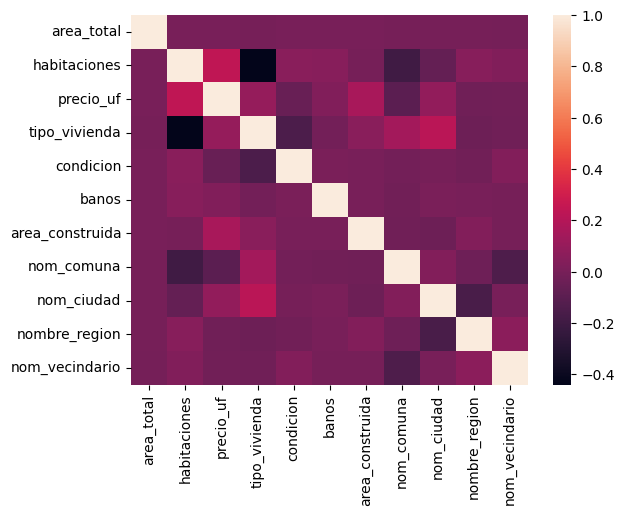

In [170]:
corrMatrix = data.select_dtypes(include=['float64', 'int64']).corr()
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
sns.heatmap(corrMatrix)
plt.show()

# TRATAMIENTO DE OUTLIERS

In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20224 entries, 0 to 20223
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area_total       20224 non-null  float64
 1   habitaciones     20224 non-null  float64
 2   precio_uf        20224 non-null  float64
 3   tipo_vivienda    20224 non-null  int64  
 4   condicion        20224 non-null  int64  
 5   banos            20224 non-null  float64
 6   area_construida  20224 non-null  float64
 7   nom_comuna       20224 non-null  int64  
 8   nom_ciudad       20224 non-null  int64  
 9   nombre_region    20224 non-null  int64  
 10  nom_vecindario   20224 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 1.7 MB


In [172]:
outliers=['area_total',	'habitaciones',	'banos', 'area_construida', 'precio_uf']
for col in outliers:
  try:
    max = data[col].describe()[6]+1.5*(data[col].describe()[6]-data[col].describe()[4]) #Q3+1.5*IQR
  except:
    continue
  query = col+'>@max'
  data.drop(data.query(query).index, inplace=True)

<ipython-input-172-78920affc836>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max = data[col].describe()[6]+1.5*(data[col].describe()[6]-data[col].describe()[4]) #Q3+1.5*IQR
<ipython-input-172-78920affc836>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max = data[col].describe()[6]+1.5*(data[col].describe()[6]-data[col].describe()[4]) #Q3+1.5*IQR
<ipython-input-172-78920affc836>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16697 entries, 0 to 20223
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area_total       16697 non-null  float64
 1   habitaciones     16697 non-null  float64
 2   precio_uf        16697 non-null  float64
 3   tipo_vivienda    16697 non-null  int64  
 4   condicion        16697 non-null  int64  
 5   banos            16697 non-null  float64
 6   area_construida  16697 non-null  float64
 7   nom_comuna       16697 non-null  int64  
 8   nom_ciudad       16697 non-null  int64  
 9   nombre_region    16697 non-null  int64  
 10  nom_vecindario   16697 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 1.5 MB


In [174]:
data=data.reset_index(drop=True)

# ENTRENAMIENTO ML

In [175]:
X = data.drop('precio_uf', axis=1)
y = data['precio_uf']

In [176]:
X

,area_total,habitaciones,tipo_vivienda,condicion,banos,area_construida,nom_comuna,nom_ciudad,nombre_region,nom_vecindario
0,214.00,4.0,0,0,3.0,123.22,30,5,0,94
1,216.46,3.0,0,0,3.0,84.84,30,5,0,201
2,73.54,3.0,0,0,2.0,73.54,30,5,0,168
3,136.00,3.0,0,0,3.0,73.54,30,5,0,168
4,87.28,3.0,0,0,2.0,71.13,30,5,0,94
...,...,...,...,...,...,...,...,...,...,...
16692,59.00,2.0,1,1,2.0,55.00,42,12,0,18
16693,51.00,2.0,1,1,2.0,51.00,42,12,0,56
16694,450.00,7.0,0,0,3.0,124.00,23,12,0,140
16695,225.00,4.0,0,0,3.0,126.00,23,12,0,140


In [177]:
y

,precio_uf
0,3839.000000
1,3558.000000
2,3209.000000
3,3219.000000
4,4890.000000
...,...
16692,2842.105263
16693,3400.000000
16694,7894.736842
16695,8105.263158


In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)

## Regresion Lineal

In [179]:
model = LinearRegression()

In [180]:
model.fit(X_train, y_train)

LinearRegression()

In [181]:
# Imprimimos los coeficientes y el intercepto
print(model.intercept_)
print(model.coef_)

-3067.664946727785
[   9.27277906 -191.21247996  626.54304073  117.88650778 1232.53510765
   27.16503973    1.50511626  266.42474264 -264.46947705   -1.23363928]


In [182]:
#evaluar el modelo
y_pred = model.predict(X_test)

In [183]:
#calcular las métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"R-cuadrado (R2): {r2}")

Error cuadrático medio (MSE): 4376609.415955261
R-cuadrado (R2): 0.6354822437039145


In [184]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Index')

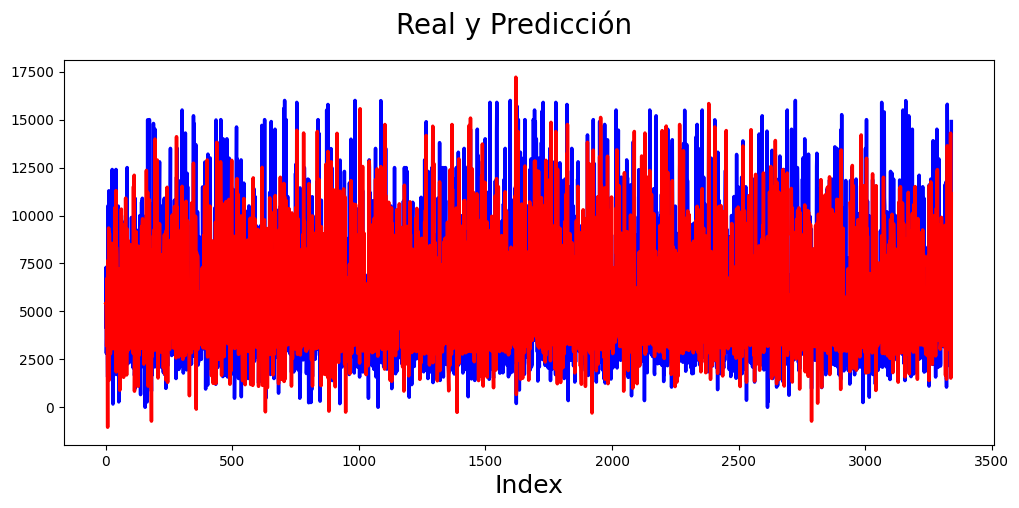

In [185]:
# Real contra predicción
plt.figure(figsize = (12,5))

c = [i for i in range(1,len(X_test.index)+1,1)] # generating index

plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red", linewidth=2.5, linestyle="-")
plt.suptitle('Real y Predicción', fontsize=20)
plt.xlabel('Index', fontsize=18)

In [186]:
#Guardar el modelo
import joblib
joblib.dump(model, 'modelo_vivienda.pkl')

['modelo_vivienda.pkl']

### testeo del modelo

In [205]:
import joblib

# Reemplaza 'nombre_del_modelo.pkl' con el nombre real del archivo donde guardaste el modelo
model = joblib.load('modelo_vivienda.pkl')

In [206]:
# Ejemplo:

#vivienda_a_evaluar = pd.DataFrame({
#       'habitaciones': [4],  # Reemplaza con el valor real
#       'pobreza': [0.5],   # Reemplaza con el valor real
#       'area_total': [100]  # Reemplaza con el valor real
#   })

vivienda_a_evaluar = pd.DataFrame(X.iloc[100]).T
vivienda_a_evaluar


,area_total,habitaciones,tipo_vivienda,condicion,banos,area_construida,nom_comuna,nom_ciudad,nombre_region,nom_vecindario
100,139.0,6.0,0.0,1.0,3.0,130.0,30.0,5.0,0.0,111.0


In [207]:
y.iloc[100]

3289.47368421053

In [208]:
prediccion_precio = model.predict(vivienda_a_evaluar)

In [209]:
prediccion_precio

array([5661.26669904])

In [192]:
#hacer una predicción
print(f"La predicción del precio para la vivienda es: {prediccion_precio[0]} UF")

La predicción del precio para la vivienda es: 4651.9139147316955 UF


## KNN

In [210]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [194]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [195]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [196]:
y_pred_knn = knn.predict(X_test_scaled)

In [197]:
print("KNN - MSE:", mean_squared_error(y_test, y_pred_knn))
print("KNN - R2:", r2_score(y_test, y_pred_knn))

KNN - MSE: 2230880.901060456
KNN - R2: 0.8141950484194955


In [211]:
#Guardar el modelo
import joblib
joblib.dump(knn, 'modelo_vivienda_knn.pkl')

['modelo_vivienda_knn.pkl']

### Testeo del Modelo

Text(0.5, 0, 'Index')

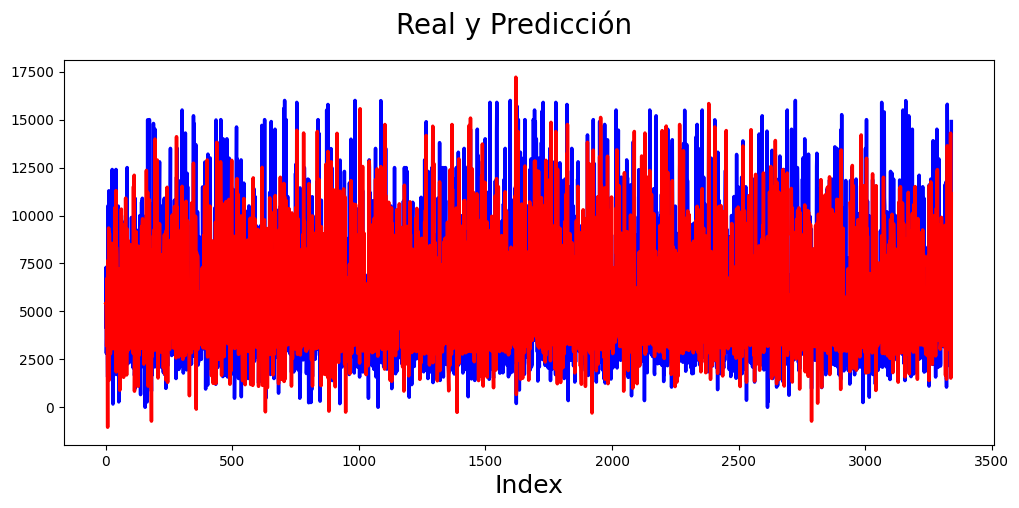

In [212]:
# Real contra predicción
plt.figure(figsize = (12,5))

c = [i for i in range(1,len(X_test.index)+1,1)] # generating index

plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red", linewidth=2.5, linestyle="-")
plt.suptitle('Real y Predicción', fontsize=20)
plt.xlabel('Index', fontsize=18)

In [213]:
import joblib

# Reemplaza 'nombre_del_modelo.pkl' con el nombre real del archivo donde guardaste el modelo
model_knn = joblib.load('modelo_vivienda_knn.pkl')

In [215]:
# Ejemplo:

#vivienda_a_evaluar = pd.DataFrame({
#       'habitaciones': [4],  # Reemplaza con el valor real
#       'pobreza': [0.5],   # Reemplaza con el valor real
#       'area_total': [100]  # Reemplaza con el valor real
#   })

vivienda_a_evaluar = pd.DataFrame(X.iloc[100]).T
vivienda_a_evaluar


,area_total,habitaciones,tipo_vivienda,condicion,banos,area_construida,nom_comuna,nom_ciudad,nombre_region,nom_vecindario
100,139.0,6.0,0.0,1.0,3.0,130.0,30.0,5.0,0.0,111.0


In [216]:
y.iloc[100]

3289.47368421053

In [217]:
prediccion_precio = model_knn.predict(vivienda_a_evaluar)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


In [218]:
prediccion_precio

array([12318.28421053])